### **1. Описание датасета**

*   **Предметная область:** Психология образования, исследование психического здоровья студентов, профилактика стрессовых состояний в образовательной среде.
*   **Источник данных:** [Kaggle: Student Stress Monitoring Datasets](https://www.kaggle.com/datasets/mdsultanulislamovi/student-stress-monitoring-datasets) - данные общенационального опроса студентов.
*   **Характер данных:** Реальные анонимизированные данные, собранные через структурированные опросы с использованием валидированных психометрических шкал.   

### **2. Описание атрибутов**

Датасет содержит 21 признак и целевую переменную `stress_level`, сгруппированные в 5 научно-обоснованных категорий на основе общенационального опроса студентов. Все признаки являются числовыми, но семантически их можно разделить на следующие категории:

#### **🧠 Психологические факторы (Psychological Factors)**
- `anxiety_level` - уровень тревожности
- `self_esteem` - уровень самооценки  
- `mental_health_history` - история проблем с психическим здоровьем
- `depression` - наличие депрессии

#### **🏥 Физиологические факторы (Physiological Factors)**
- `headache` - наличие головных болей
- `blood_pressure` - проблемы с артериальным давлением
- `sleep_quality` - качество сна
- `breathing_problem` - проблемы с дыханием

#### **🌆 Факторы окружающей среды (Environmental Factors)**
- `noise_level` - уровень шума в месте проживания
- `living_conditions` - условия проживания
- `safety` - чувство безопасности
- `basic_needs` - обеспеченность базовыми потребностями

#### **🎓 Академические факторы (Academic Factors)**
- `academic_performance` - академическая успеваемость
- `study_load` - учебная нагрузка
- `teacher_student_relationship` - отношения с преподавателями
- `future_career_concerns` - беспокойство о будущей карьере

#### **🤝 Социальные факторы (Social Factors)**
- `social_support` - уровень социальной поддержки
- `peer_pressure` - давление со стороны сверстников
- `extracurricular_activities` - участие во внеучебной деятельности
- `bullying` - столкновение с буллингом

#### **Целевая переменная**
- `stress_level` (3 класса) - уровень стресса (категориальная переменная, где:
  - 0: Низкий уровень стресса
  - 1: Средний уровень стресса  
  - 2: Высокий уровень стресса)

**Примечание:** Датасет является результатом общенационального опроса студентов и включает 1100 записей без пропущенных значений и дубликатов. Все бинарные переменные закодированы как 0 (Нет) и 1 (Да)

### **Ход работы**

#### **Импорт библиотек и загрузка датасета**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('StressLevelDataset.csv')

#### **Среднее значение и СКО атрибутов**

In [3]:
stats_df = pd.DataFrame({
    'Среднее': df.mean(),
    'Стандартное_отклонение': df.std()
})
stats_df

,Среднее,Стандартное_отклонение
anxiety_level,11.063636,6.117558
self_esteem,17.777273,8.944599
mental_health_history,0.492727,0.500175
depression,12.555455,7.727008
headache,2.508182,1.409356
blood_pressure,2.181818,0.833575
sleep_quality,2.660000,1.548383
breathing_problem,2.753636,1.400713
noise_level,2.649091,1.328127
living_conditions,2.518182,1.119208


#### **Гистограммы распределения значений атрибутов**

- **Столбцы**: показывают количество наблюдений в каждом интервале значений
- **Кривая (KDE)**: сглаженная линия, отражающая форму распределения
- **Красная линия**: среднее значение (центр распределения)
- **Оранжевые линии**: границы ±1 стандартное отклонение (мера разброса)

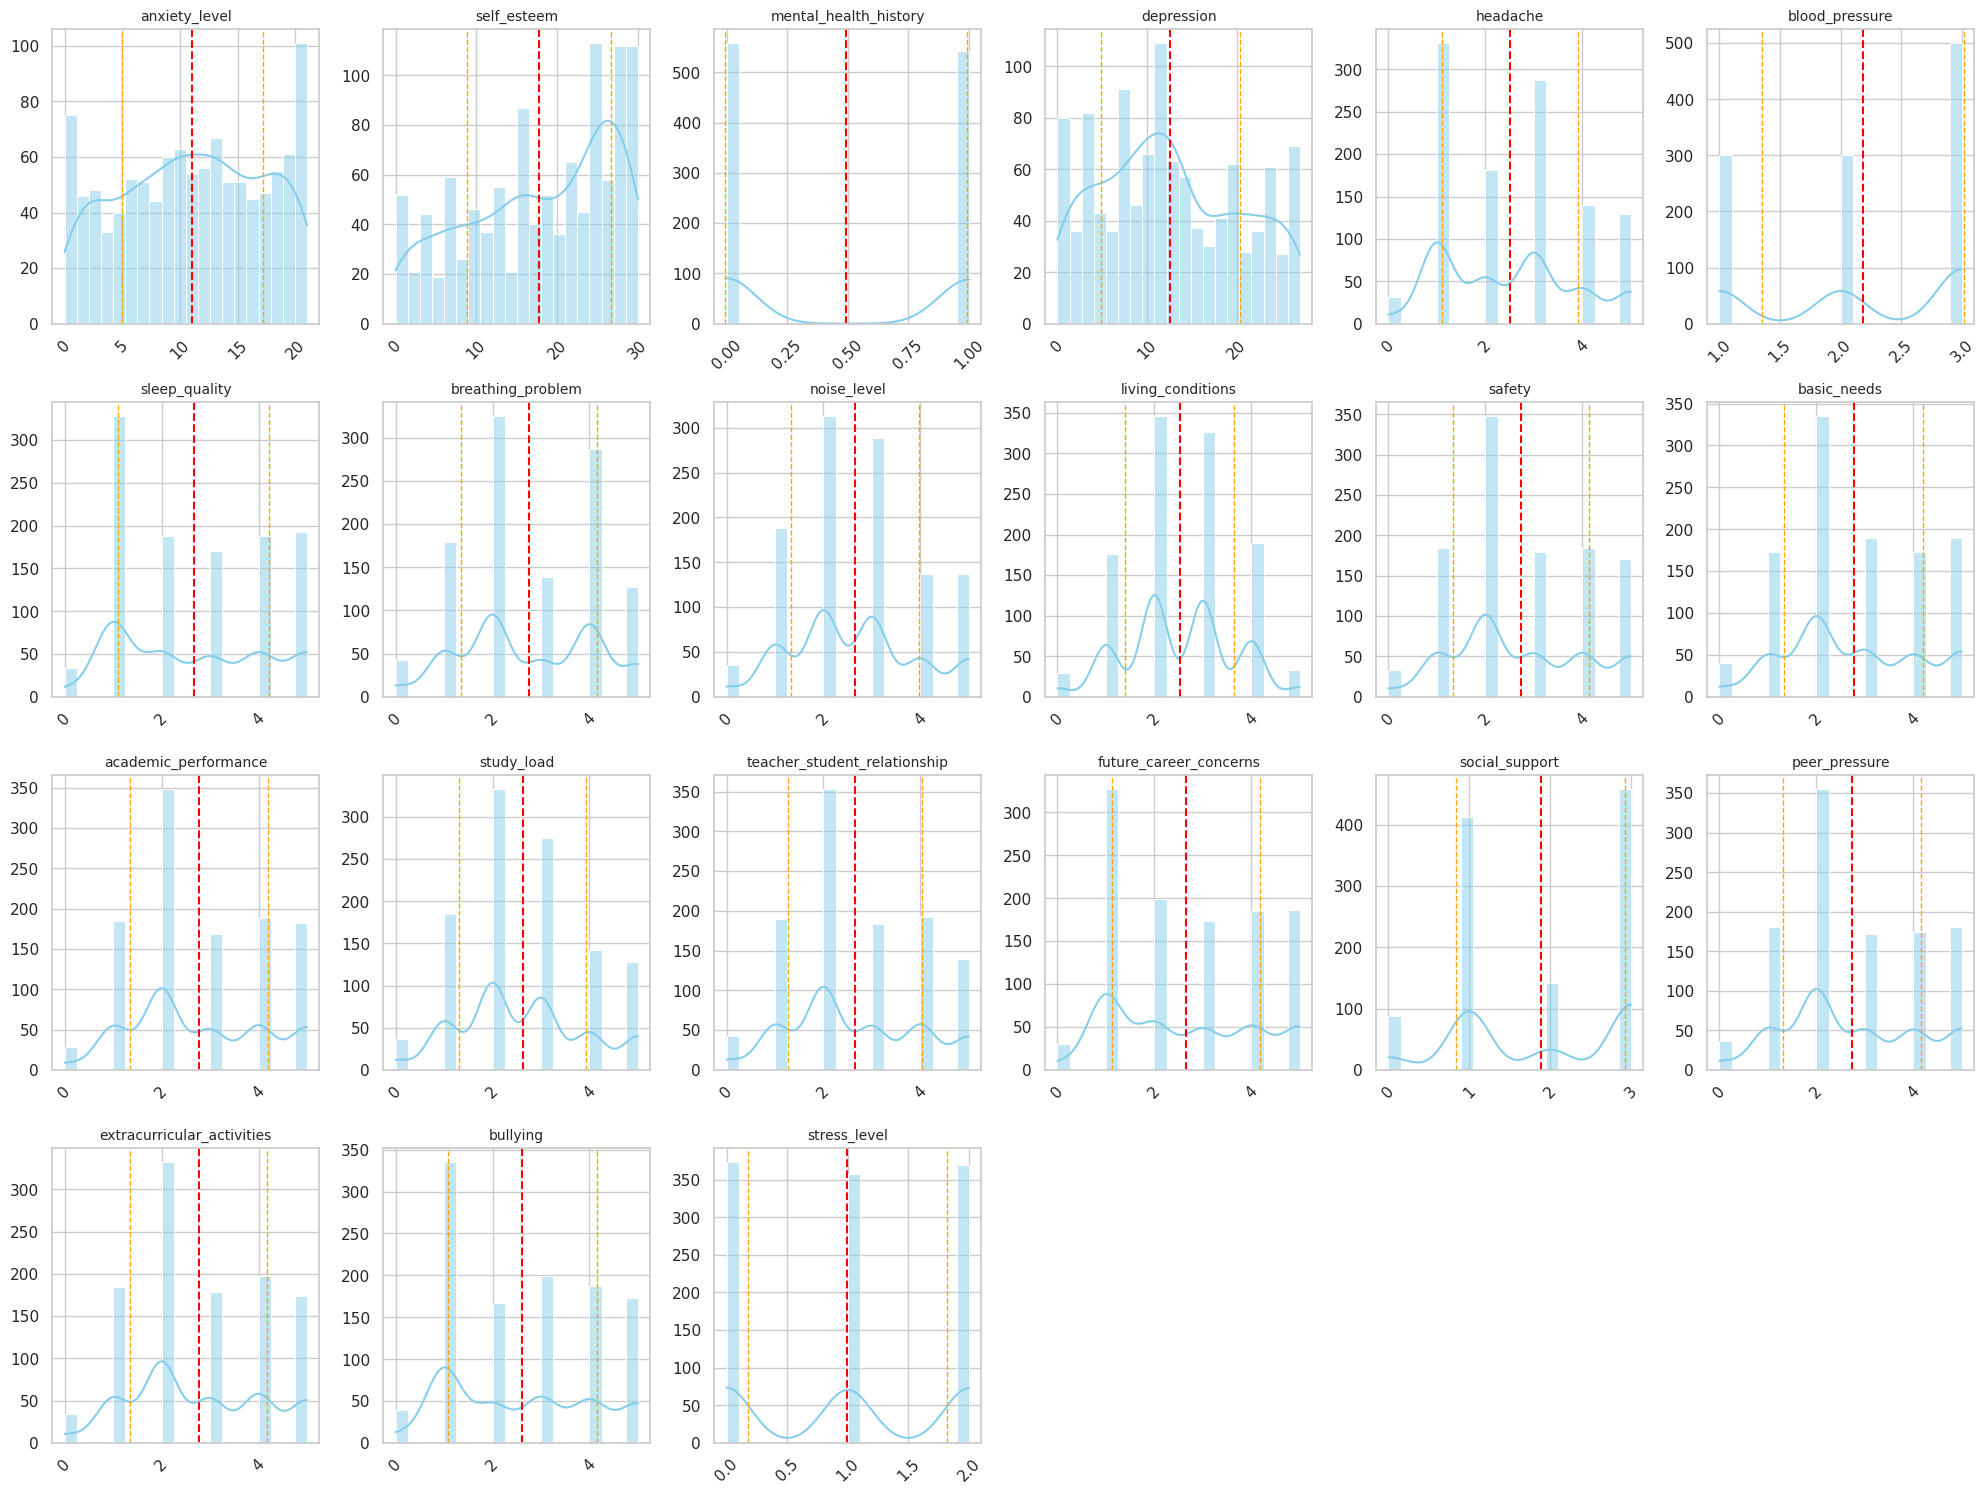

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 6, i)
    sns.histplot(df[column], kde=True, bins=20, color='skyblue')
    
    mean_val = df[column].mean()
    std_val = df[column].std()
    
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    plt.axvline(mean_val + std_val, color='orange', linestyle='--', linewidth=1)
    plt.axvline(mean_val - std_val, color='orange', linestyle='--', linewidth=1)
    
    plt.title(column, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    
    plt.xticks(rotation=45)

plt.tight_layout()

#### **Анализ выбросов с использованием метода межквартильного размаха (IQR)**
##### *Этот метод будет использован так как он не предполагает нормального распределения данных*

In [5]:
outlier_summary = []
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percent = len(outliers) / len(df) * 100
    
    outlier_summary.append({
        'Атрибут': column,
        'Выбросы (кол-во)': len(outliers),
        'Выбросы (%)': f'{outlier_percent:.2f}%',
        'Нижняя граница': lower_bound,
        'Верхняя граница': upper_bound
    })

# Создаем и выводим DataFrame с результатами
outlier_df = pd.DataFrame(outlier_summary)
print("Сводка по выбросам:")
print(outlier_df)

Сводка по выбросам:
                         Атрибут  Выбросы (кол-во) Выбросы (%)  \
0                  anxiety_level                 0       0.00%   
1                    self_esteem                 0       0.00%   
2          mental_health_history                 0       0.00%   
3                     depression                 0       0.00%   
4                       headache                 0       0.00%   
5                 blood_pressure                 0       0.00%   
6                  sleep_quality                 0       0.00%   
7              breathing_problem                 0       0.00%   
8                    noise_level               173      15.73%   
9              living_conditions                62       5.64%   
10                        safety                 0       0.00%   
11                   basic_needs                 0       0.00%   
12          academic_performance                 0       0.00%   
13                    study_load               165      

#### **Проверка и обработка упущенных значений**

##### *Несмотря на примечание надо удостовериться в отсутствии упущенных значений*

In [6]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Создаем таблицу с результатами
missing_df = pd.DataFrame({
    'Пропущенные значения': missing_values,
    'Доля пропусков, %': missing_percentage.round(2)
})
missing_df

,Пропущенные значения,"Доля пропусков, %"
anxiety_level,0,0.0
self_esteem,0,0.0
mental_health_history,0,0.0
depression,0,0.0
headache,0,0.0
blood_pressure,0,0.0
sleep_quality,0,0.0
breathing_problem,0,0.0
noise_level,0,0.0
living_conditions,0,0.0


#### **Анализ пропущенных значений**

Пропущенных значений в данных не обнаружено. Все записи полные и готовы для дальнейшего анализа.

##### Если бы пропуски были, то можно было бы применить следующие стратегии обработки:

1. **Менее 5% пропусков** - заполнить медианой (числовые данные) или модой (категориальные данные)
2. **5-30% пропусков** - использовать методы машинного обучения (KNN, MICE) для импутации
3. **Более 30% пропусков** - рассмотреть удаление признака или создание индикаторной переменной

#### **Определение корреляции между параметрами**

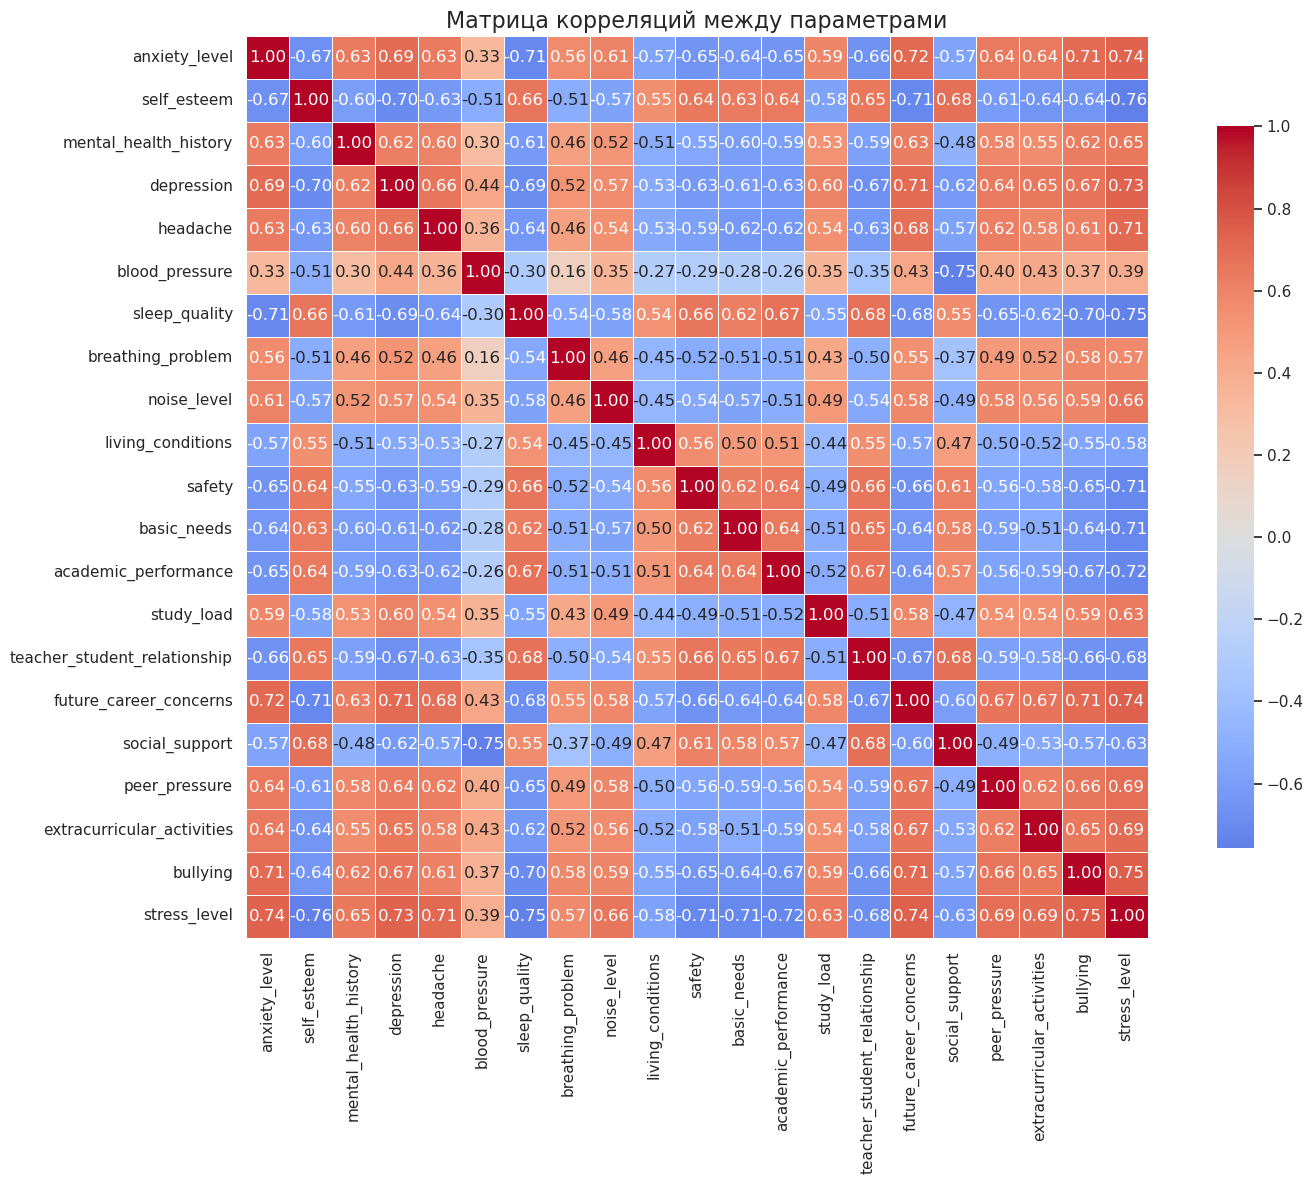

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})
plt.title('Матрица корреляций между параметрами', fontsize=16)
plt.tight_layout()
plt.show()

#### **Находим высококоррелированные пары признаков (|r| > 0.7)**

In [8]:
high_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr.append((correlation_matrix.columns[i], 
                              correlation_matrix.columns[j], 
                              corr_value))

high_corr_sorted = sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)

print("Высококоррелированные пары признаков (|r| > 0.7):")
for pair in high_corr_sorted:
    feature1, feature2, corr_value = pair
    correlation_type = "положительная" if corr_value > 0 else "отрицательная"
    strength = "очень сильная" if abs(corr_value) > 0.9 else "сильная"
    print(f"{feature1} - {feature2}: {corr_value:.3f} ({strength} {correlation_type} корреляция)")

Высококоррелированные пары признаков (|r| > 0.7):
self_esteem - stress_level: -0.756 (сильная отрицательная корреляция)
blood_pressure - social_support: -0.753 (сильная отрицательная корреляция)
bullying - stress_level: 0.751 (сильная положительная корреляция)
sleep_quality - stress_level: -0.749 (сильная отрицательная корреляция)
future_career_concerns - stress_level: 0.743 (сильная положительная корреляция)
anxiety_level - stress_level: 0.737 (сильная положительная корреляция)
depression - stress_level: 0.734 (сильная положительная корреляция)
academic_performance - stress_level: -0.721 (сильная отрицательная корреляция)
anxiety_level - future_career_concerns: 0.717 (сильная положительная корреляция)
headache - stress_level: 0.713 (сильная положительная корреляция)
self_esteem - future_career_concerns: -0.713 (сильная отрицательная корреляция)
future_career_concerns - bullying: 0.711 (сильная положительная корреляция)
anxiety_level - sleep_quality: -0.710 (сильная отрицательная корре

#### **Находим пары признаков с очень слабой корреляцией (|r| < 0.1)**

In [9]:
weak_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < 0.1:
            weak_corr.append((correlation_matrix.columns[i], 
                             correlation_matrix.columns[j], 
                             corr_value))

weak_corr_sorted = sorted(weak_corr, key=lambda x: abs(x[2]))

print("\nПары признаков с очень слабой корреляцией (|r| < 0.1):")
for pair in weak_corr_sorted[:20]:  # Показываем первые 20 пар
    feature1, feature2, corr_value = pair
    print(f"{feature1} - {feature2}: {corr_value:.3f}")


Пары признаков с очень слабой корреляцией (|r| < 0.1):


##### *Пары признаков с очень слабой корреляцией не наблюдаются*

#### **Находим пары признаков с наименьшей средней корреляцией)**

In [10]:
mean_correlation = correlation_matrix.abs().mean().sort_values()

print("\nПризнаки с наименьшей средней корреляцией с другими признаками:")
print(mean_correlation.head(10))


Признаки с наименьшей средней корреляцией с другими признаками:
blood_pressure                0.397192
breathing_problem             0.507901
living_conditions             0.530734
study_load                    0.547598
noise_level                   0.560226
mental_health_history         0.582255
social_support                0.585583
extracurricular_activities    0.603556
peer_pressure                 0.603982
basic_needs                   0.604035
dtype: float64


#### **Построение матрицы графиков рассеивания**

##### *Выбираем наиболее значимые признаки для матрицы графиков рассеивания, так как признаков много*


Построение матрицы графиков рассеивания для ключевых признаков...


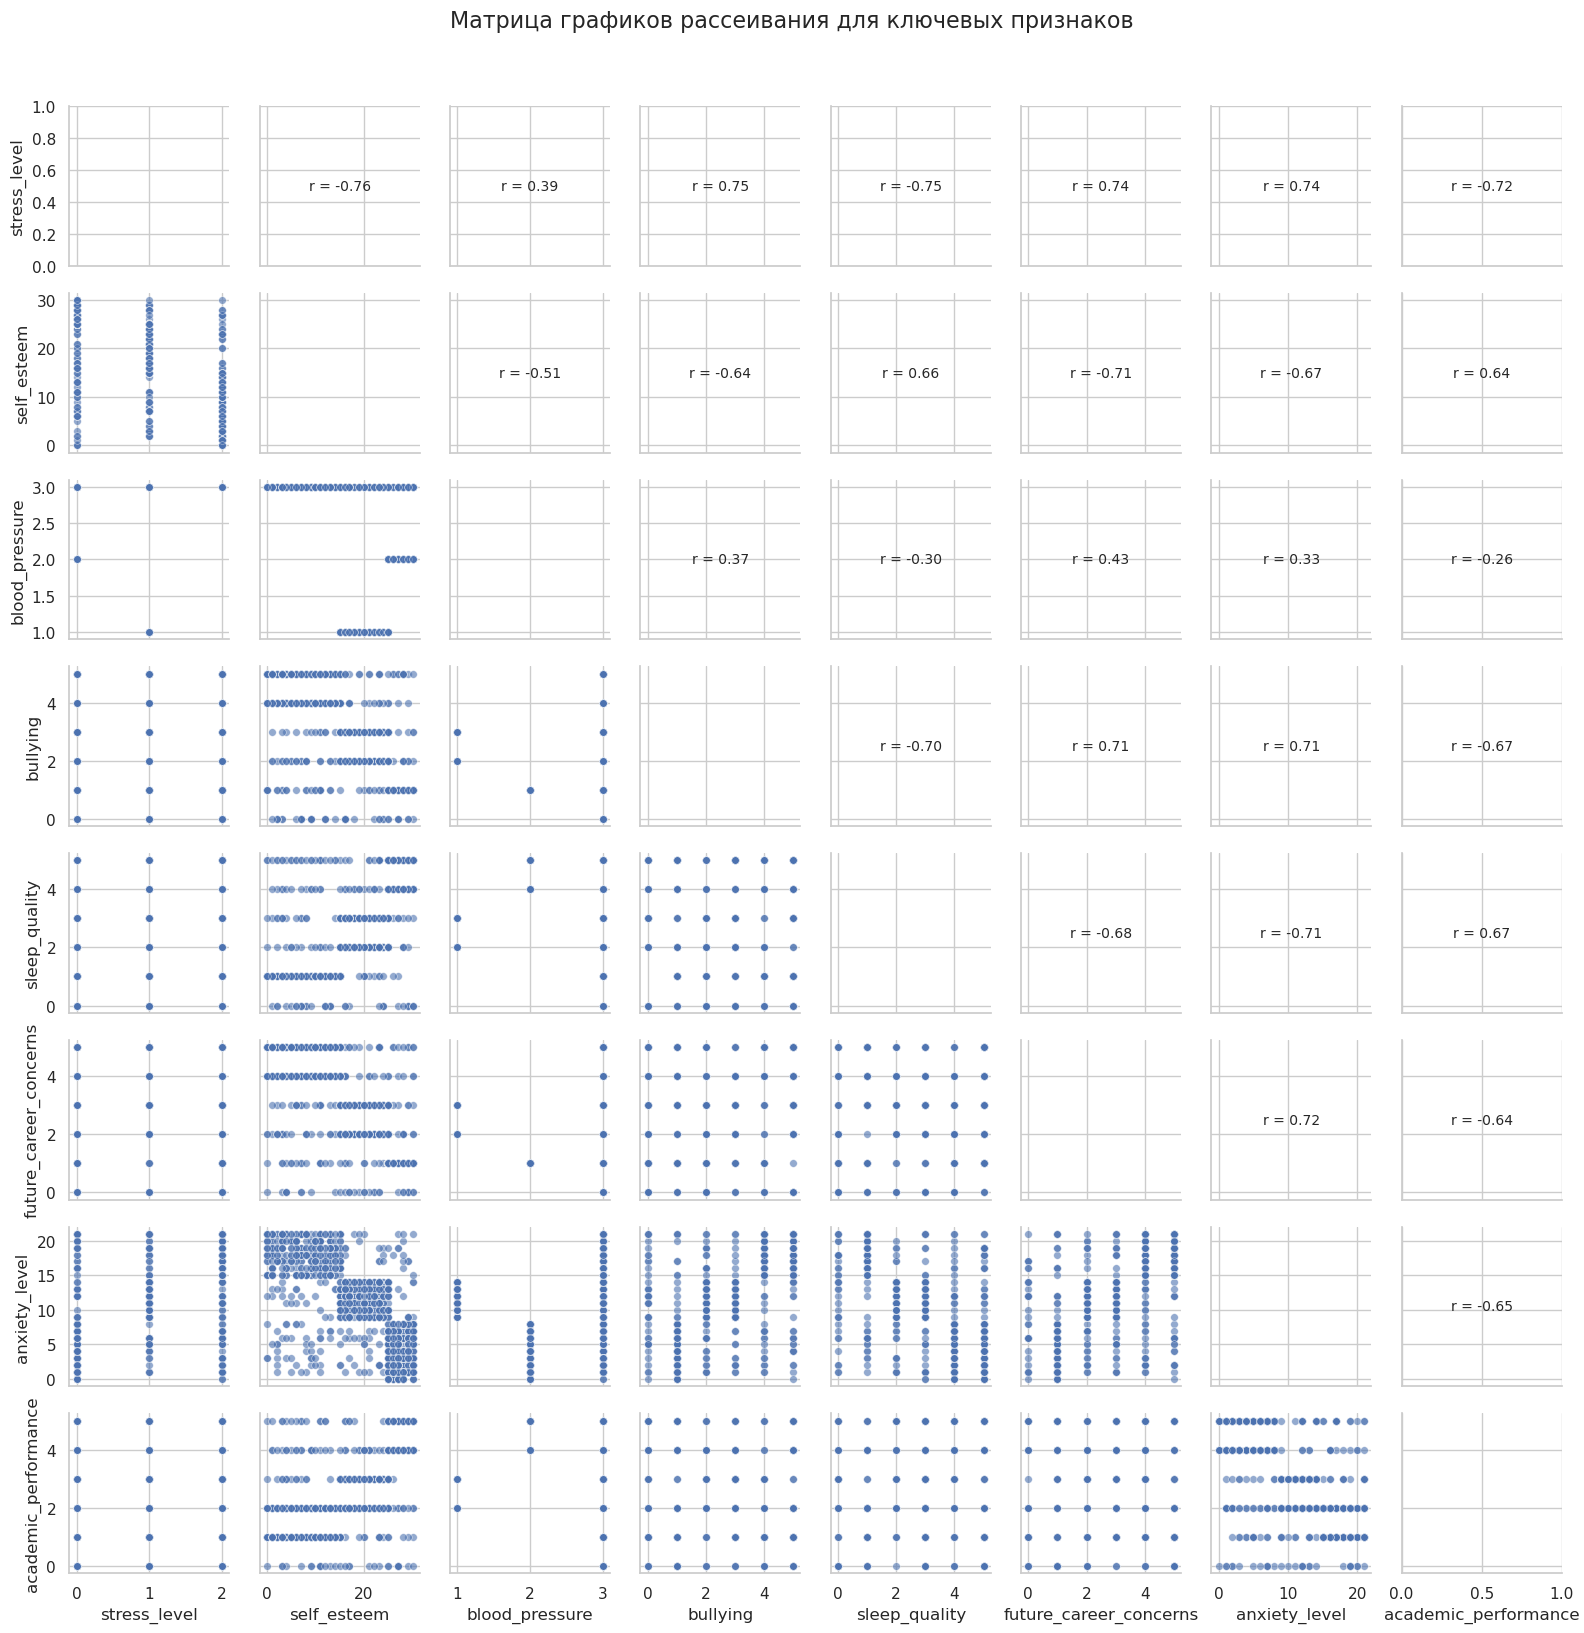

In [11]:
# Признаки, которые сильно коррелируют с stress_level (основной показатель)
key_features = [
    'stress_level',           # Основной целевой показатель
    'self_esteem',            # Сильная отрицательная корреляция (-0.756)
    'blood_pressure',         # Сильная отрицательная корреляция с social_support
    'bullying',               # Сильная положительная корреляция (0.751)
    'sleep_quality',          # Сильная отрицательная корреляция (-0.749)
    'future_career_concerns', # Сильная положительная корреляция (0.743)
    'anxiety_level',          # Сильная положительная корреляция (0.737)
    'academic_performance'    # Сильная отрицательная корреляция (-0.721)
]

key_df = df[key_features]

print("Построение матрицы графиков рассеивания для ключевых признаков...")

g = sns.PairGrid(key_df, diag_sharey=False, height=2)
g.map_lower(sns.scatterplot, alpha=0.6, s=30)
g.map_upper(lambda x, y, **kws: plt.gca().text(0.5, 0.5, 
              f"r = {key_df[x.name].corr(key_df[y.name]):.2f}", 
              transform=plt.gca().transAxes, 
              ha='center', va='center', fontsize=10))

plt.suptitle('Матрица графиков рассеивания для ключевых признаков', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()